In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Age"]=df["Age"].astype(int)

In [41]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [42]:
df["FamilySize"]=df["SibSp"]+df["Parch"] + 1

In [43]:
df=df.drop(["Cabin","Ticket","SibSp","Parch"],axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   FamilySize   891 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 59.3+ KB


In [45]:
(df["Survived"].groupby(df["Sex"]).mean()*100).round(2)

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

In [46]:
(df["Survived"].groupby(df["Pclass"]).mean()*100).round(2)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

<BarContainer object of 2 artists>

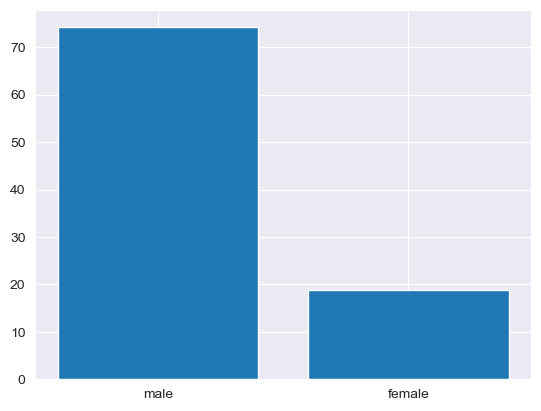

In [47]:
plt.bar(df["Sex"].unique(),(df["Survived"].groupby(df["Sex"]).mean()*100).round(2))

<BarContainer object of 3 artists>

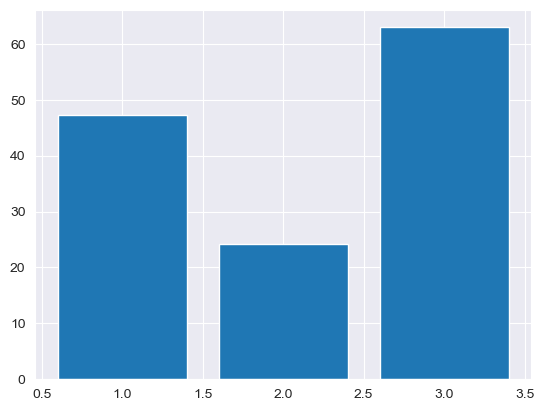

In [48]:
plt.bar(df["Pclass"].unique(),(df["Survived"].groupby(df["Pclass"]).mean()*100).round(2))

In [49]:
(df["Survived"].groupby(df["Embarked"]).mean()*100).round(2)

Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64

<BarContainer object of 3 artists>

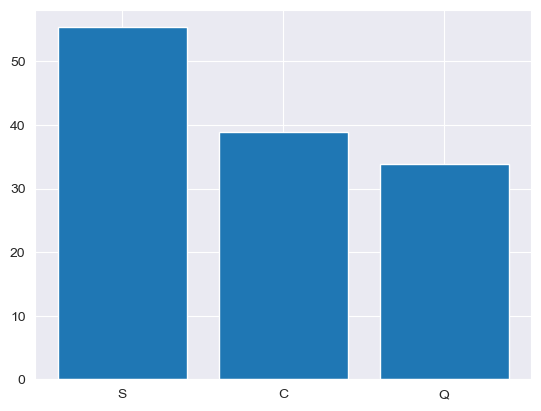

In [50]:
plt.bar(df["Embarked"].unique(),(df["Survived"].groupby(df["Embarked"]).mean()*100).round(2))

In [51]:
df["Fare"].groupby(df["Pclass"]).mean().round(2)

Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64

<BarContainer object of 3 artists>

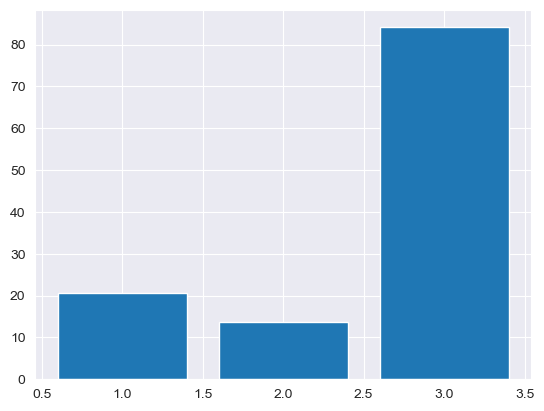

In [52]:
plt.bar(df["Pclass"].unique(),df["Fare"].groupby(df["Pclass"]).mean().round(2))

Text(0.5, 1.0, 'Survival Rates by Sex and Class')

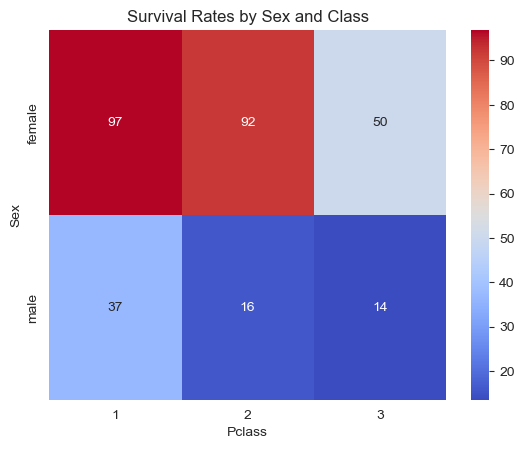

In [53]:
survival_rates = df.groupby(["Sex", "Pclass"])["Survived"].mean()*100
survival_rates = survival_rates.unstack().round(2)
sns.heatmap(survival_rates, annot=True, cmap="coolwarm")
plt.xlabel("Pclass")
plt.ylabel("Sex")
plt.title("Survival Rates by Sex and Class")


In [54]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [55]:
def is_alone(row):
    if row["FamilySize"] == 1:
        return 1
    else:
        return 0
df["IsAlone"] = df.apply(is_alone, axis=1)

In [56]:
df.drop(["Name","FamilySize"], axis=1, inplace=True)

In [57]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,0,22,7.2500,0,0
1,2,1,1,1,38,71.2833,1,0
2,3,1,3,1,26,7.9250,0,1
3,4,1,1,1,35,53.1000,0,0
4,5,0,3,0,35,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,13.0000,0,1
887,888,1,1,1,19,30.0000,0,1
888,889,0,3,1,29,23.4500,0,0
889,890,1,1,0,26,30.0000,1,1


<Figure size 1000x1000 with 0 Axes>

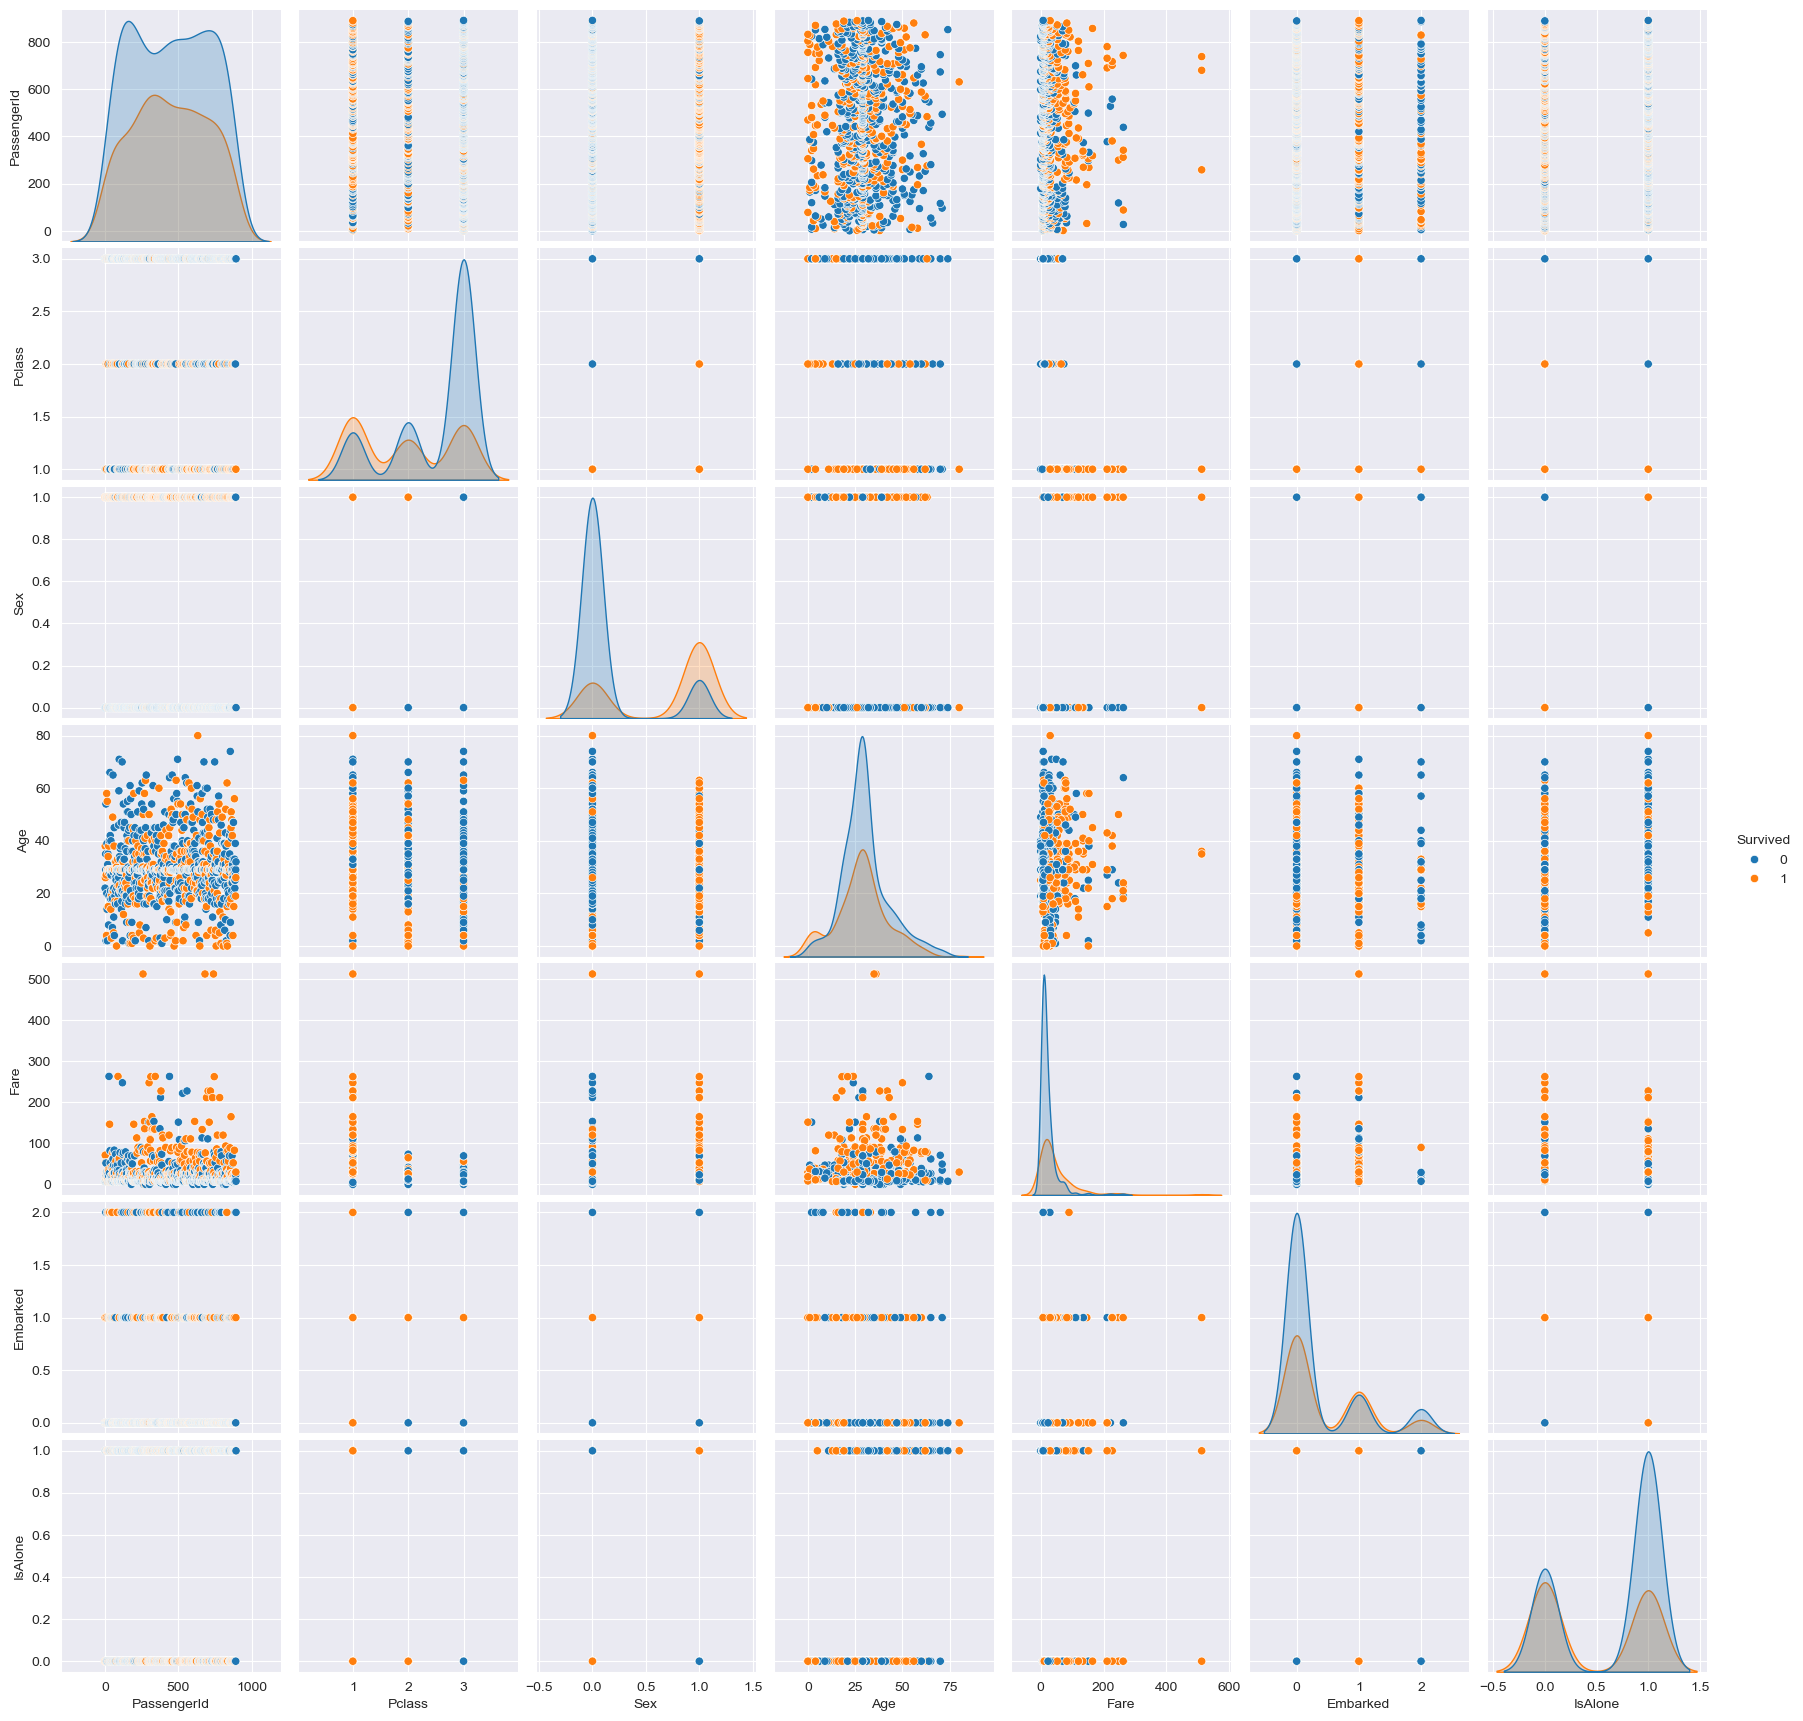

In [58]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue="Survived", diag_kind="kde")

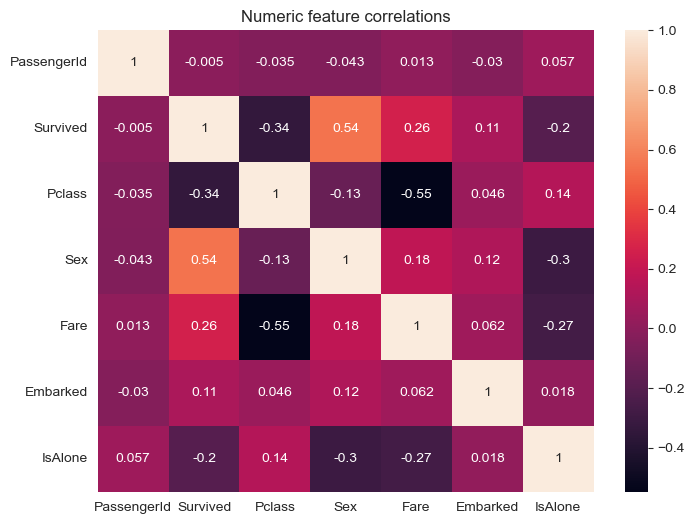

,feature,VIF
1,Pclass,4.264828
0,PassengerId,3.452636
5,IsAlone,2.573025
2,Sex,1.626836
3,Fare,1.447813
4,Embarked,1.365780


In [59]:
# numeric correlation
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Numeric feature correlations')
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[num_cols].drop(columns=['Survived'], errors='ignore').dropna()
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_df.sort_values('VIF', ascending=False))


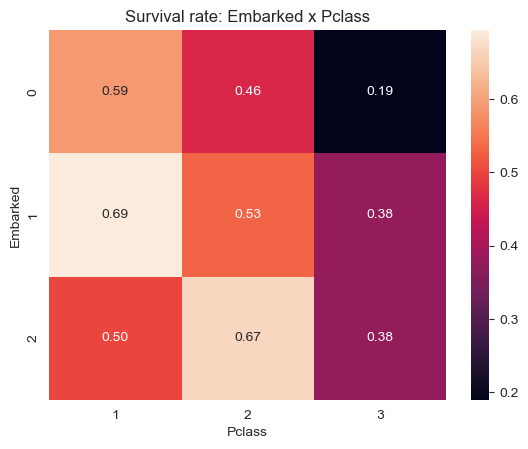

In [60]:
pt = df.pivot_table(index='Embarked', columns='Pclass', values='Survived', aggfunc='mean')
sns.heatmap(pt, annot=True, fmt='.2f')
plt.title('Survival rate: Embarked x Pclass')
plt.show()